In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

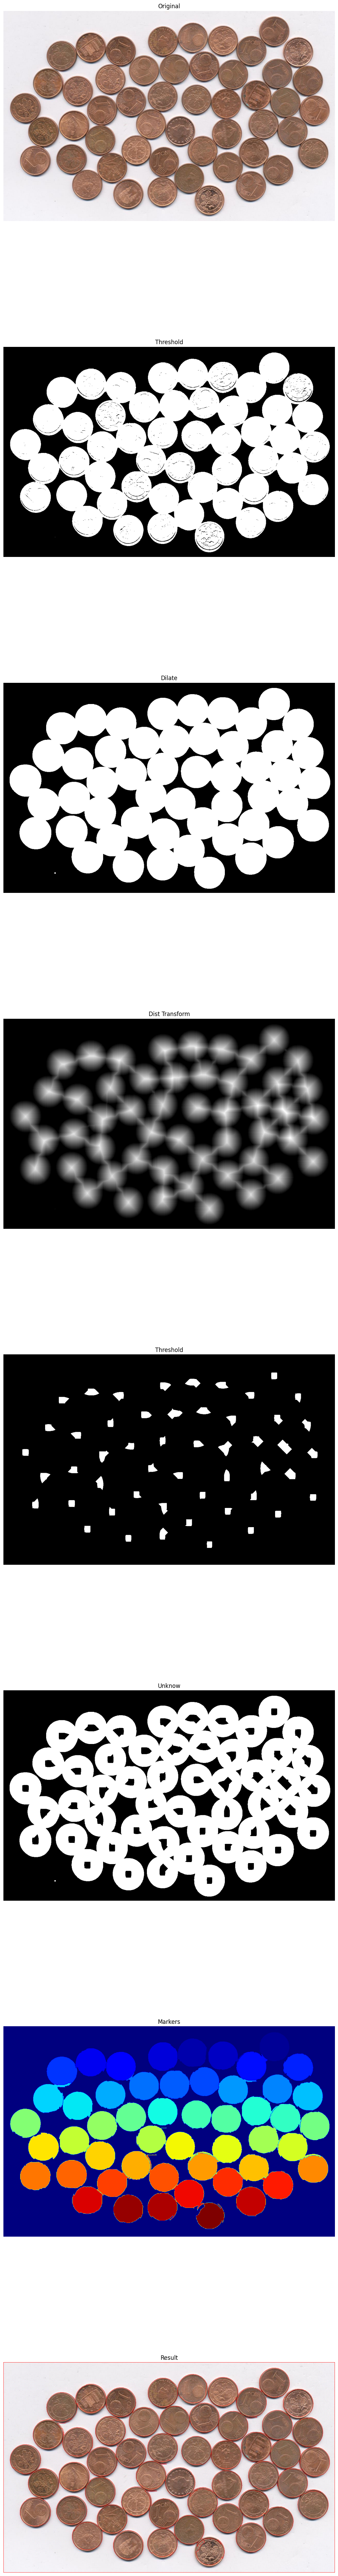

In [7]:
src = cv.imread('1.jpg')
img = src.copy()
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
sure_bg = cv.dilate(thresh, kernel, iterations=2)
dist_transform = cv.distanceTransform(sure_bg, 1, 5)
dist_transform = np.uint8(dist_transform)
ret, sure_fg = cv.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)

ret, markers1 = cv.connectedComponents(sure_fg)
 
markers = markers1 + 1
markers[unknown == 255] = 0
markers3 = cv.watershed(img, markers)
img[markers3 == -1] = [0, 0, 255]

shape=(8, 1)

plt.figure(figsize=(10, 80), dpi=100)

plt.subplot(*shape, 1), plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB)),
plt.title('Original'), plt.axis('off')
plt.subplot(*shape, 2), plt.imshow(thresh, cmap='gray'),
plt.title('Threshold'), plt.axis('off')
plt.subplot(*shape, 3), plt.imshow(sure_bg, cmap='gray'),
plt.title('Dilate'), plt.axis('off')
plt.subplot(*shape, 4), plt.imshow(dist_transform, cmap='gray'),
plt.title('Dist Transform'), plt.axis('off')
plt.subplot(*shape, 5), plt.imshow(sure_fg, cmap='gray'),
plt.title('Threshold'), plt.axis('off')
plt.subplot(*shape, 6), plt.imshow(unknown, cmap='gray'),
plt.title('Unknow'), plt.axis('off')
plt.subplot(*shape, 7), plt.imshow(np.abs(markers), cmap='jet'),
plt.title('Markers'), plt.axis('off')
plt.subplot(*shape, 8), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),
plt.title('Result'), plt.axis('off')
plt.tight_layout()
plt.show()

# cv.imshow("img",img)

# cv.waitKey(0)
# cv.destroyAllWindows()